# STUDENT PERFORMANCE INDICATOR #

## Life cycle of Machine Learning Project ##

#### *understanding the problem statement ####
#### *Data Collection ####
#### *Data checks to perform ####
#### *Exploratory Data Analysis ####
#### *Data Pre-Processing ####
#### *Model Training ####
#### *Choose best Model ####

### 1) Problem Statement
#### *This project understands how the students performance(test scores) affected by other variables such as Gender,Ethnicity,Parental level of education, Lunch and Test preparation course.

###

### 2) Data Collection ###
#### Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 ####
#### The data consists of 8 column and 1000 rows. ####

### 2.1) Import Data and Required Packages ###
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library. ####


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame ###

In [4]:
student_data = pd.read_csv('exams.csv')


### Show Top 5 Records ###

In [5]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


### Shape of the dataset ###

In [6]:
student_data.shape

(1000, 8)

### 2.2 Dataset information ###

### 3. Data Checks to perform ###

#### *Check Missing values ####
#### *Check Duplicates ####
#### *Check data type ####
#### *Check the number of unique values of each column ####
#### *Check statistics of data set ####
#### *Check various categories present in the different categorical column ####

### 3.1 Check Missing values ###

In [7]:
student_data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

###### There are no missing values in the data set ######

### 3.2 Check Duplicates ###

In [8]:
student_data.duplicated().sum()

0

###### There are no duplicates values in the data set ######

### 3.3 Check data types ###

In [9]:
# Check Null and Dtypes
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column ###

In [10]:
student_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

### 3.5 Check statistics of data set ###

In [11]:
student_data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


##### Insight #####
###### From above description of numerical data, all means are very close to each other - between 66 and 68.05; ######
###### All standard deviations are also close - between 14.6 and 15.19; ######
###### While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17 ######

### 3.7 Exploring Data ###


In [12]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [16]:
print("Categories in 'gender' variable:     ",end=" " )
print(student_data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(student_data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(student_data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(student_data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(student_data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in'parental level of education' variable: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in student_data.columns if student_data[feature].dtype != 'O']
categorical_features = [feature for feature in student_data.columns if student_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
student_data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87


### 3.8 Adding columns for "Total Score" and "Average" ###

In [20]:
student_data['total score'] = student_data['math score'] + student_data['reading score'] + student_data['writing score']
student_data['average'] = student_data['total score']/3
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [21]:
reading_full = student_data[student_data['reading score'] == 100]['average'].count()
writing_full = student_data[student_data['writing score'] == 100]['average'].count()
math_full = student_data[student_data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 9
Number of students with full marks in Writing: 13
Number of students with full marks in Reading: 10


In [22]:
reading_less_20 = student_data[student_data['reading score'] <= 20]['average'].count()
writing_less_20 = student_data[student_data['writing score'] <= 20]['average'].count()
math_less_20 = student_data[student_data['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 2
Number of students with less than 20 marks in Writing: 2
Number of students with less than 20 marks in Reading: 0


##### Insights #####
###### From above values we get students have performed the worst in Maths ######
###### Best performance is in reading section ######

### 4. Exploring Data ( Visualization)  ###
#### 4.1 Visualize average score distribution to make some conclusion. ####
##### Histogram #####
##### Kernel Distribution Function (KDE) #####

### 4.1.1 Histogram & KDE ###

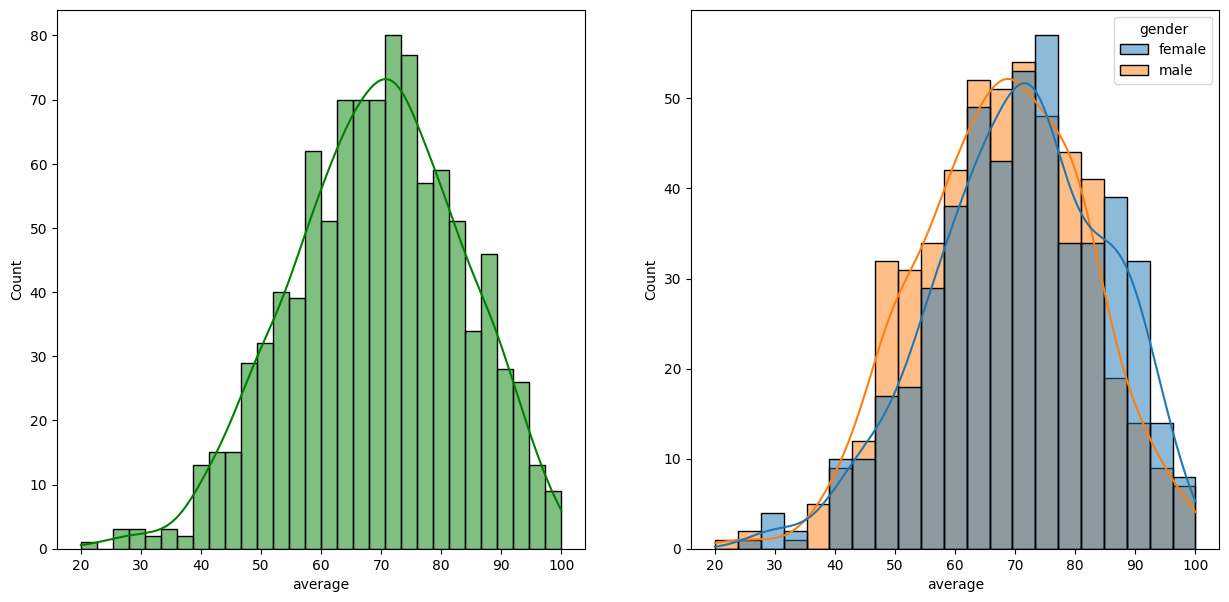

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=student_data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=student_data,x='average',kde=True,hue='gender')
plt.show()

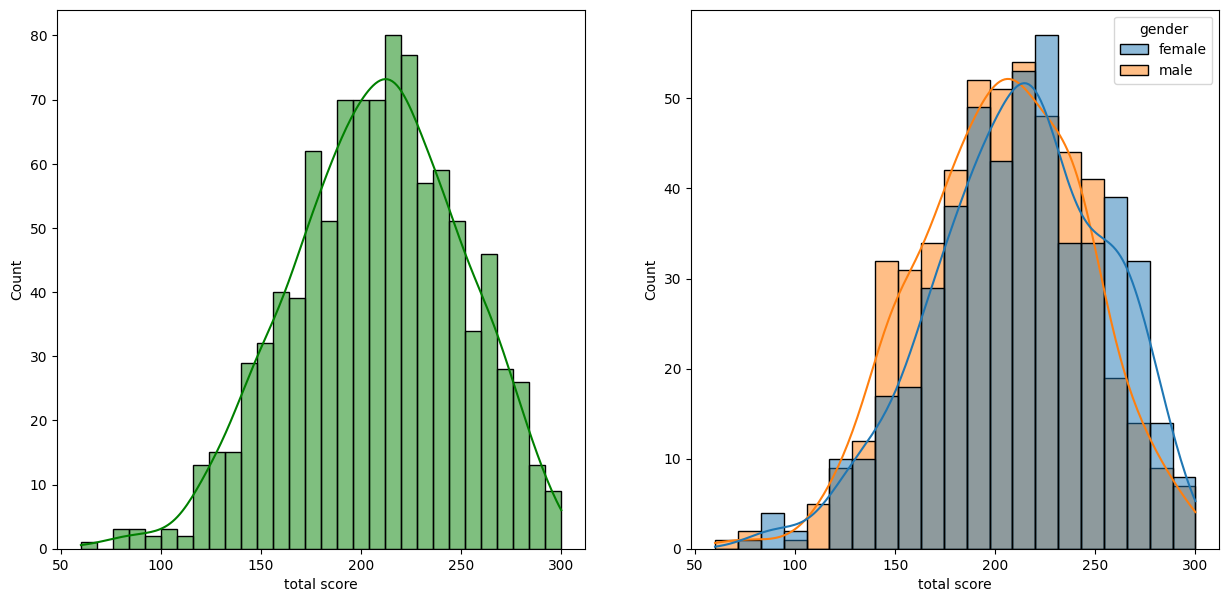

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=student_data,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=student_data,x='total score',kde=True,hue='gender')
plt.show()

#### Insights ####
##### Female students tend to perform well than male students. #####

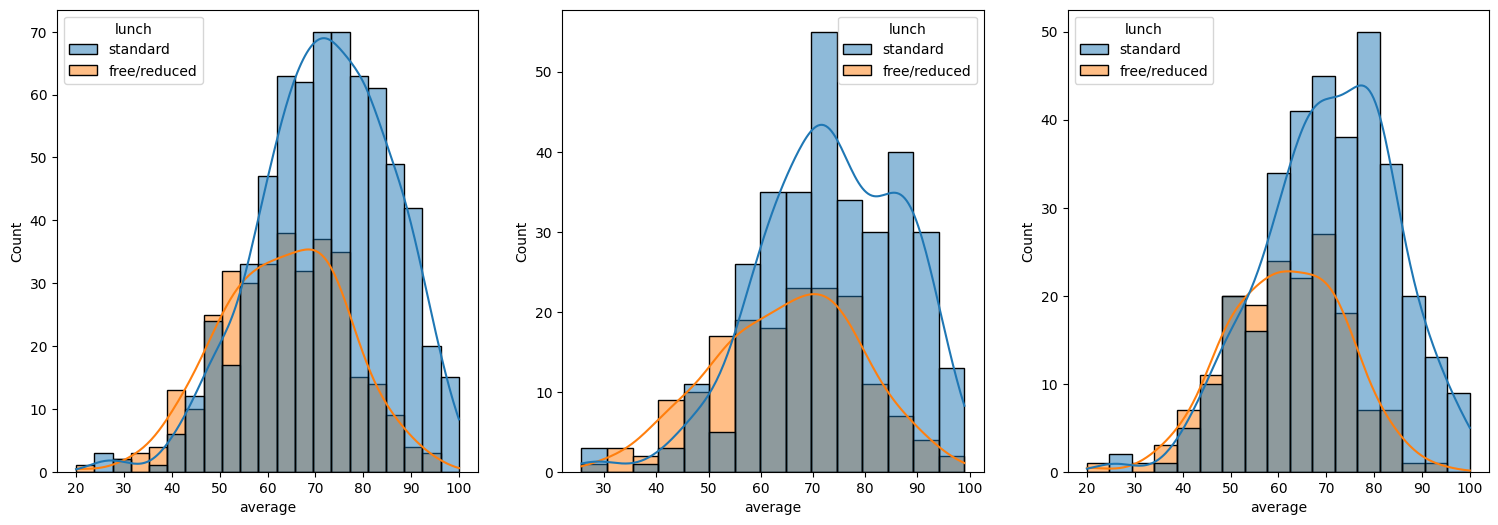

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=student_data,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=student_data[student_data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=student_data[student_data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights ####
##### Standard lunch helps perform well in exams. #####
##### Standard lunch helps perform well in exams be it a male or a female. #####

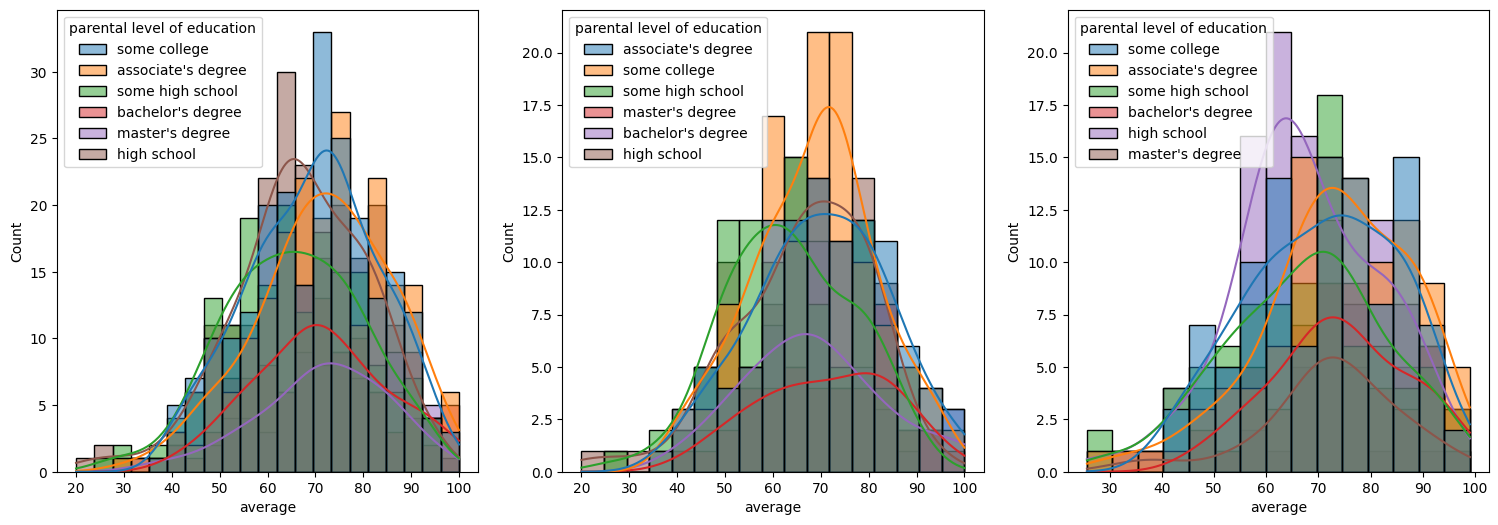

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=student_data,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=student_data[student_data.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=student_data[student_data.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Insights ####
##### In general parent's education don't help student perform well in exam. #####
##### 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam #####
##### 3rd plot we can see there is no effect of parent's education on female students. #####

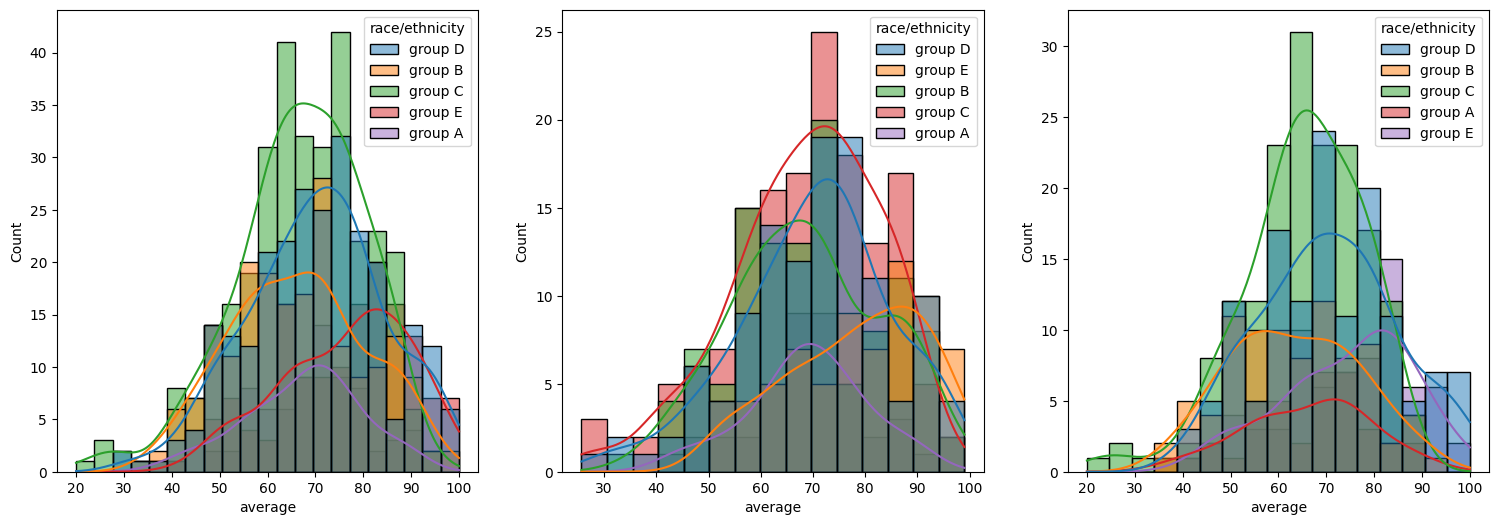

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=student_data,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=student_data[student_data.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=student_data[student_data.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights ####
##### Students of group A and group B tends to perform poorly in exam ######
##### Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female #####

### 4.2 Maximumum score of students in all three subjects ###

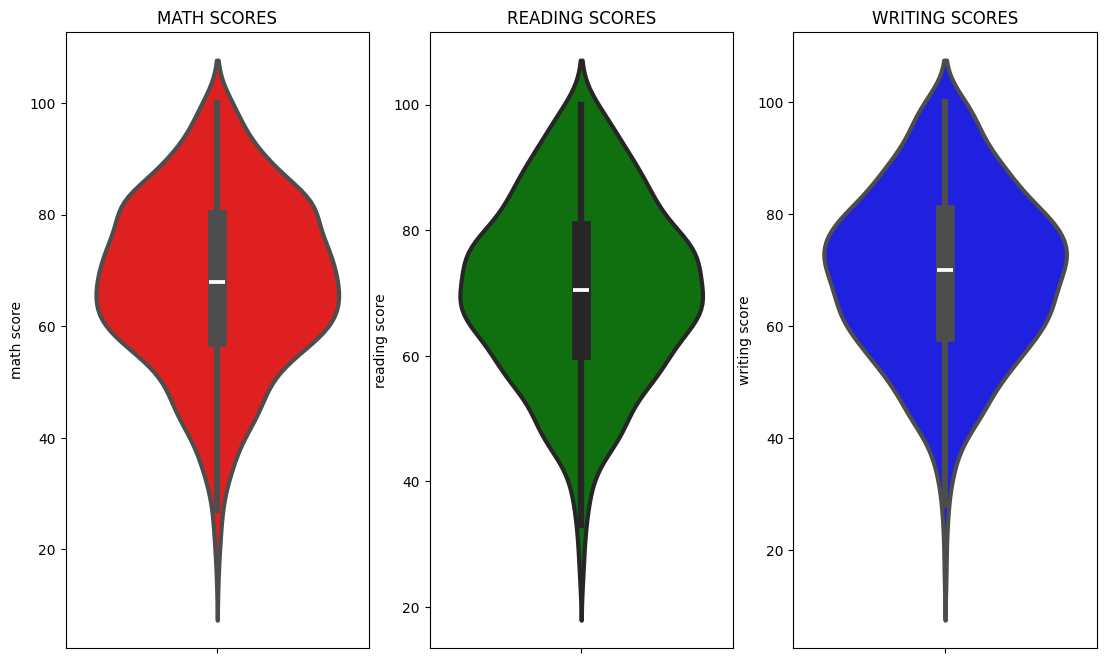

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_data,color='blue',linewidth=3)
plt.show()

 #### Insights ####
##### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80 #####

### 4.3 Multivariate analysis using pieplot ###

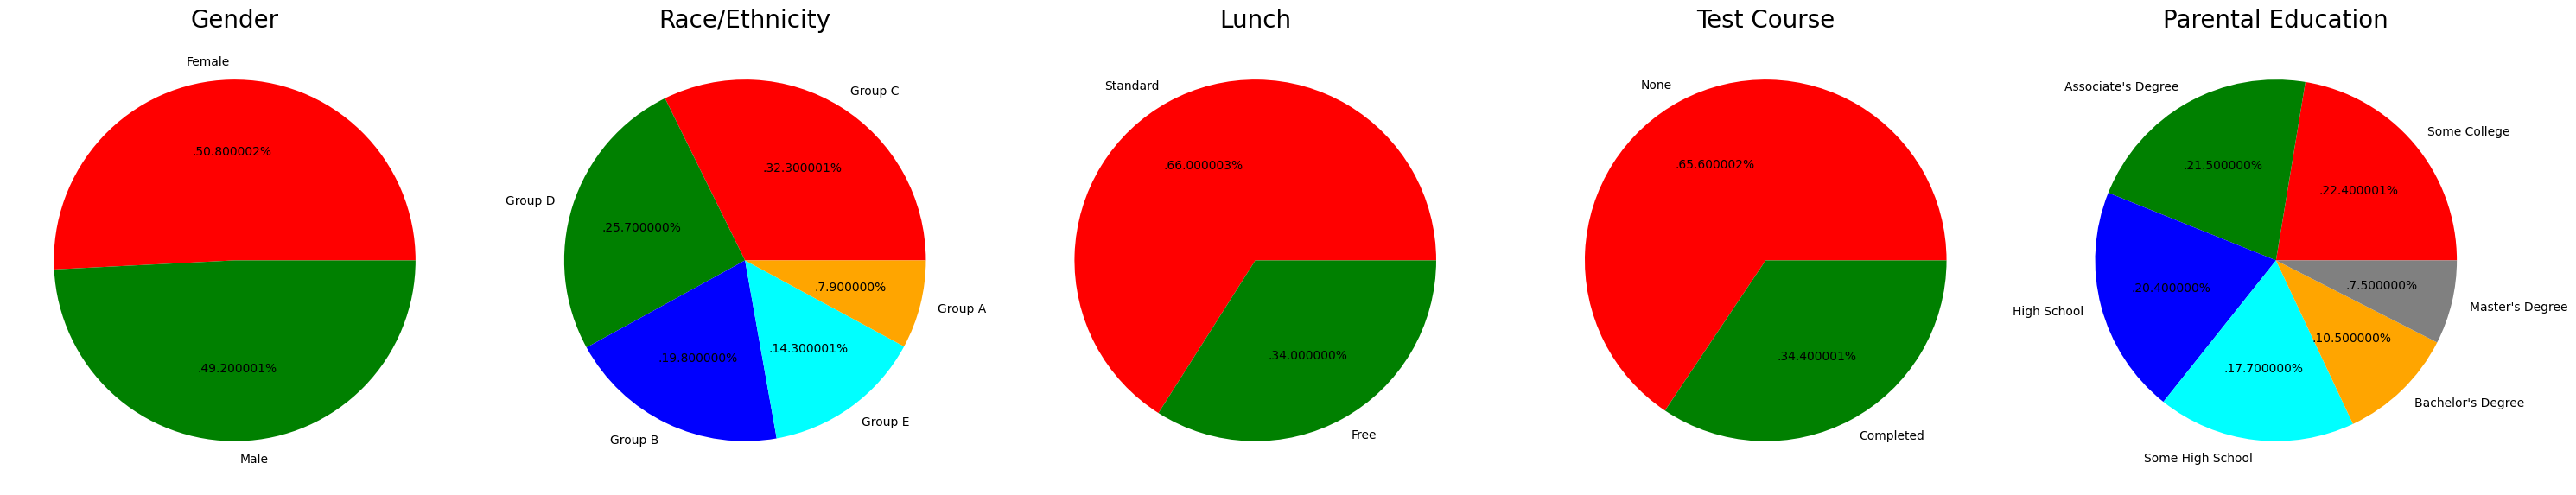

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = student_data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights ####
##### Number of Male and Female students is almost equal #####
##### Number students are greatest in Group C #####
##### Number of students who have standard lunch are greater ######
##### Number of students who have not enrolled in any test preparation course is greater #####
##### Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" #####

### 4.4 Feature Wise Visualization ###
### 4.4.1 GENDER COLUMN ###
#### How is distribution of Gender ? ####
#### Is gender has any impact on student's performance ? ####

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? ) ###

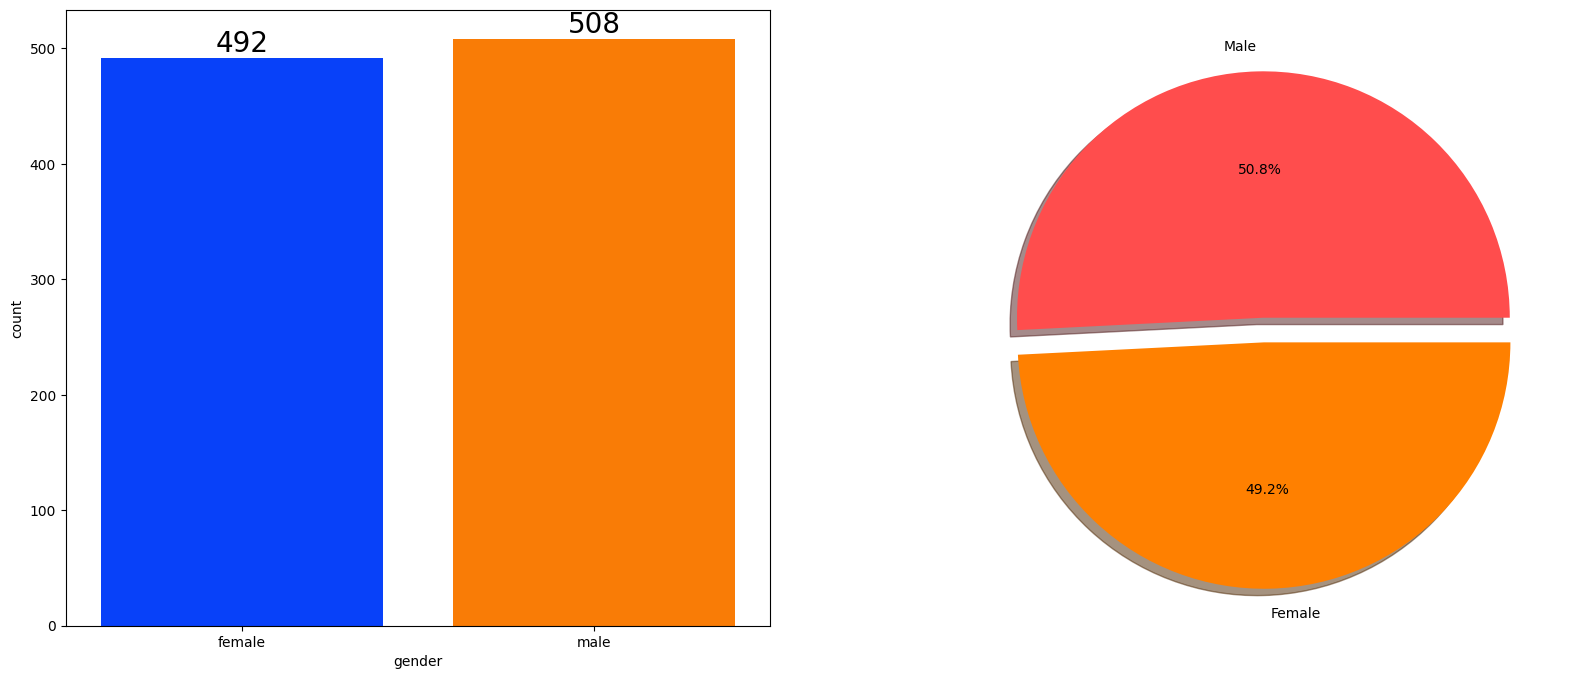

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=student_data['gender'],data=student_data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=student_data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights ####
##### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) #####

### 4.4.2 RACE/EHNICITY COLUMN ###
#### How is Group wise distribution ? ####
#### Is Race/Ehnicity has any impact on student's performance ? ####

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?) ####

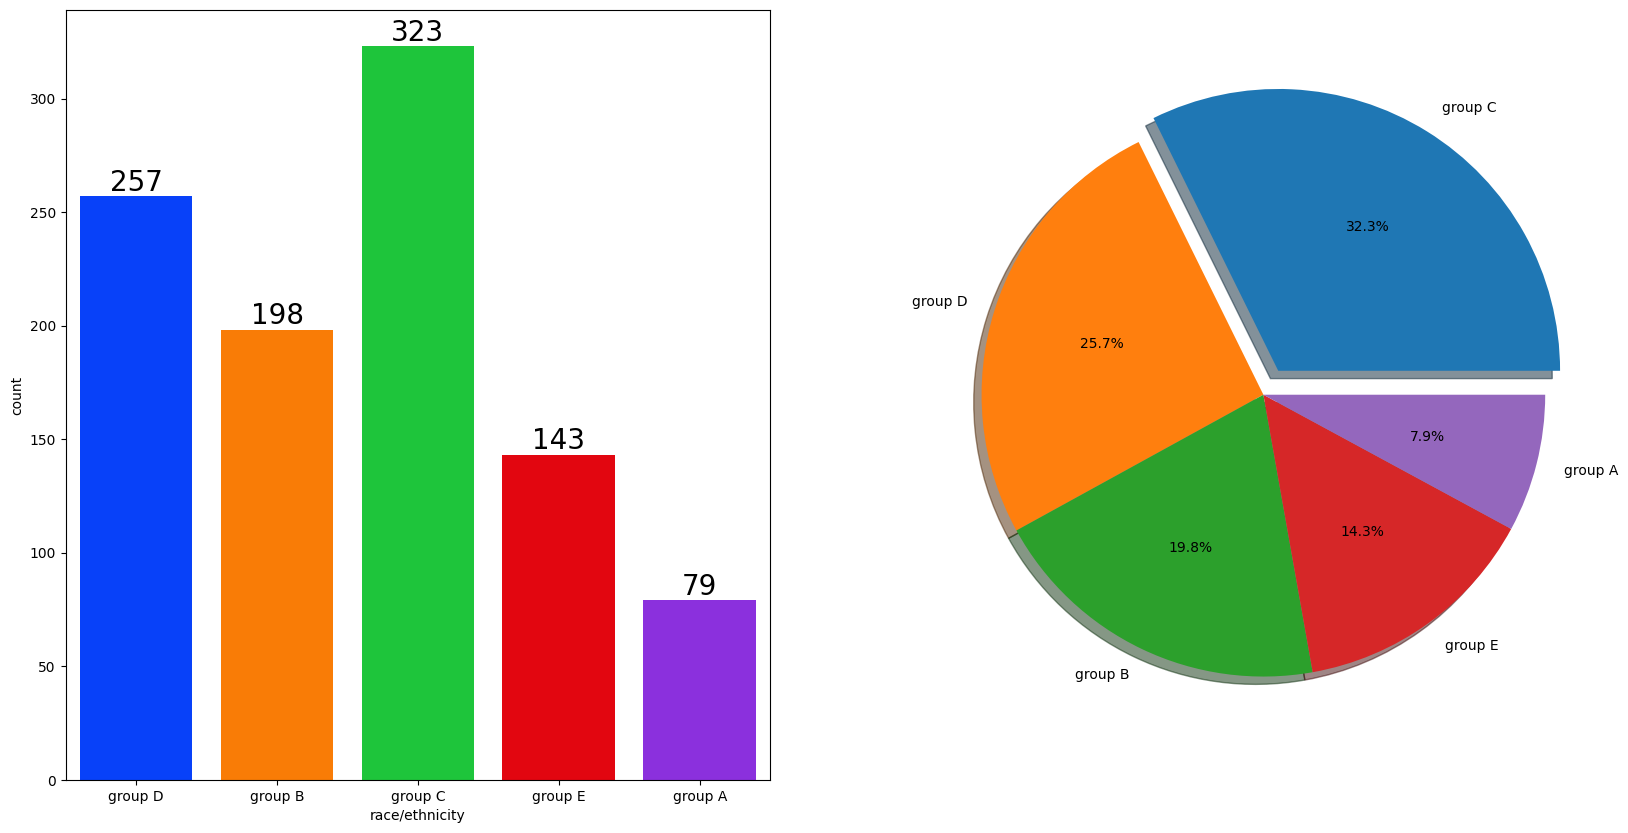

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_data['race/ethnicity'],data=student_data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = student_data['race/ethnicity'].value_counts(),labels=student_data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### Insights ####
##### Most of the student belonging from group C /group D. #####
##### Lowest number of students belong to groupA. #####

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? ) ####

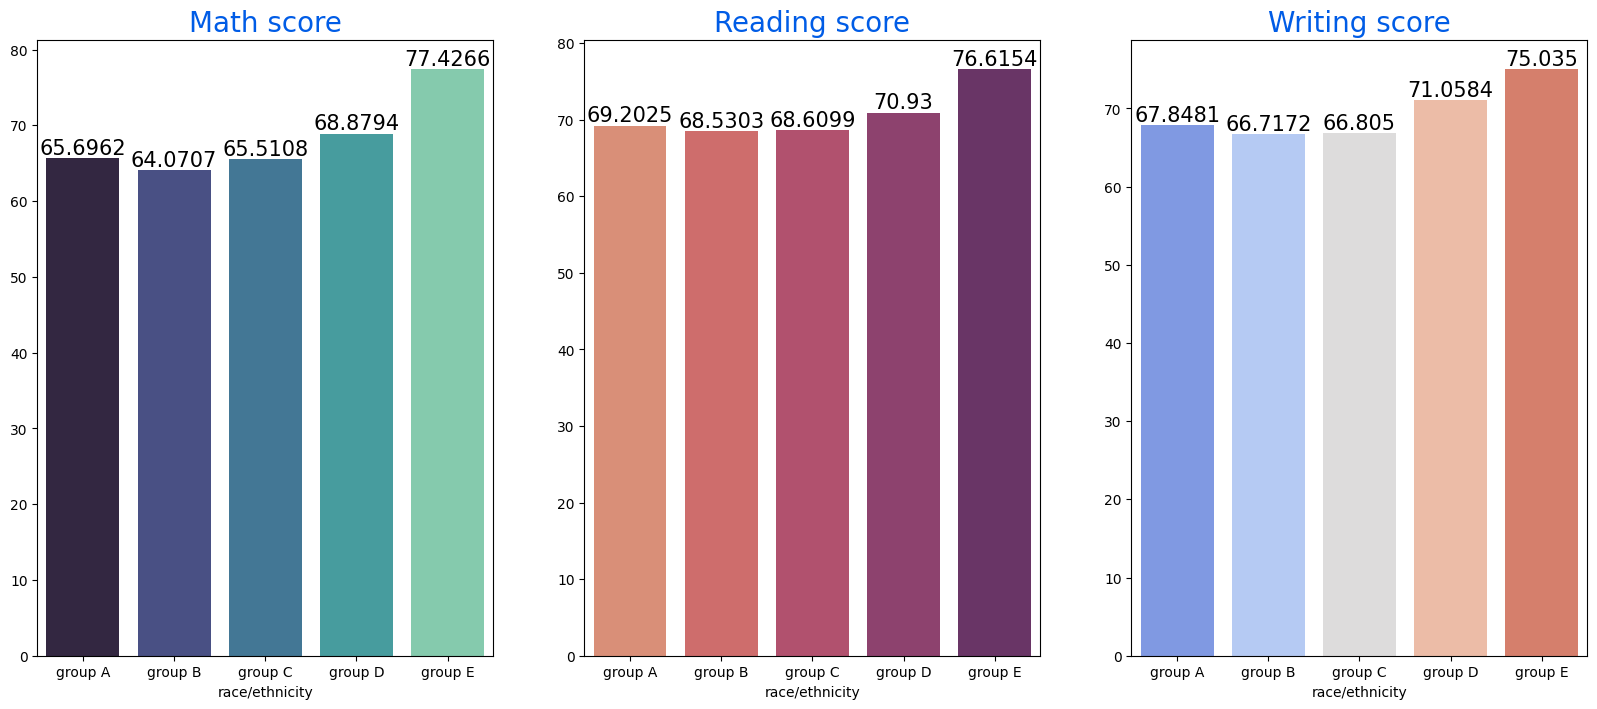

In [58]:
Group_data2=student_data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights ####
##### Group E students have scored the highest marks. #####
##### Group A students have scored the lowest marks. #####
##### Students from a lower Socioeconomic status have a lower avg in all course subjects #####

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN ###

#### What is educational background of student's parent ? ####
#### Is parental education has any impact on student's performance ? ####

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? ) ####

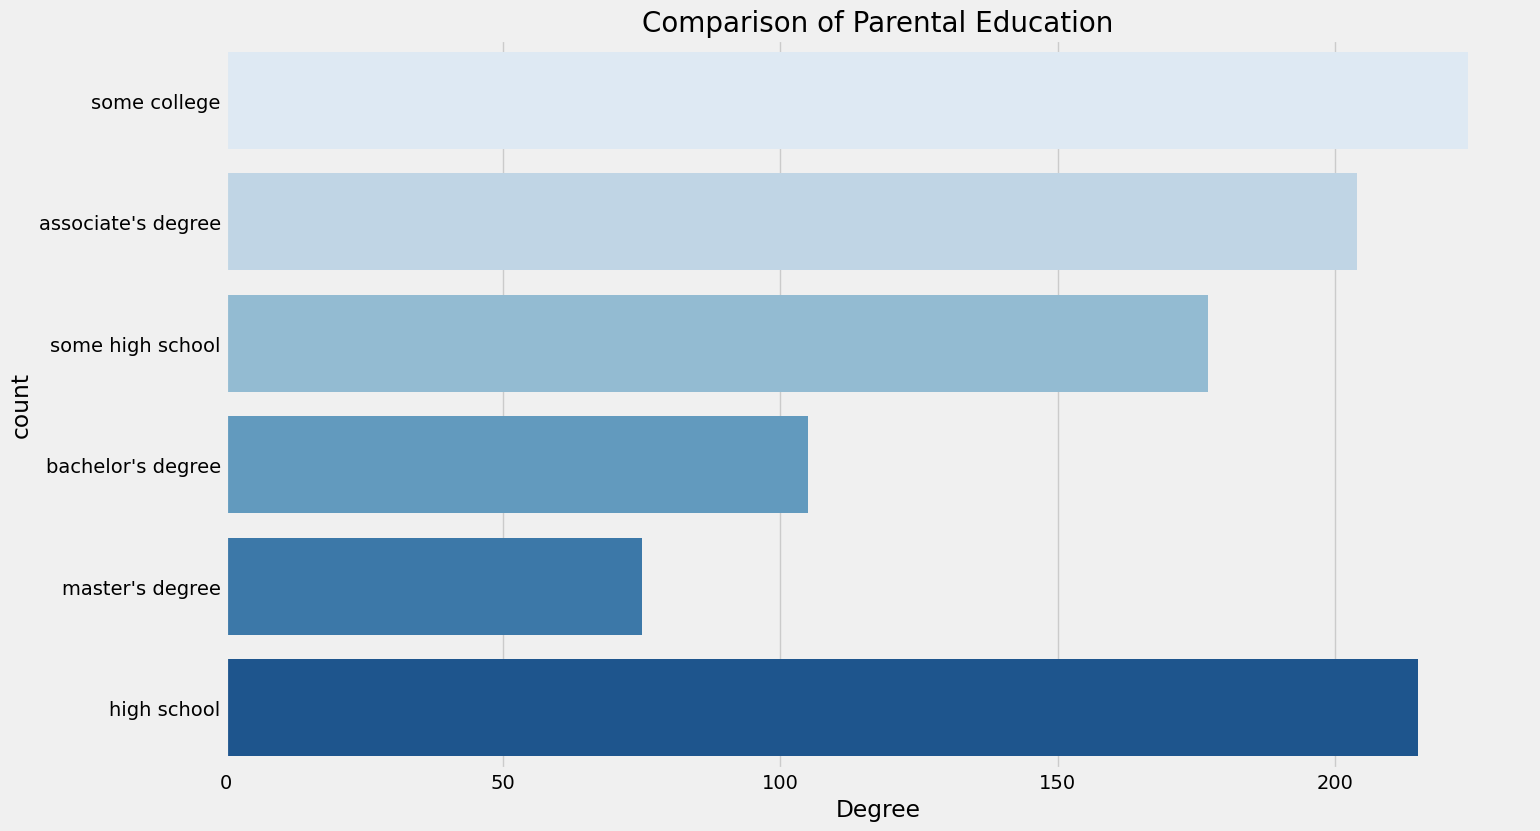

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(student_data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights ####
##### Largest number of parents are from some college. #####

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? ) ####

In [63]:
student_data.dtypes

gender                           int64
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
average                        float64
dtype: object

In [64]:
student_data["parental level of education"].value_counts()

parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

In [66]:
# Group by 'parental level of education' and calculate the mean
grouped_data = student_data.groupby('parental level of education')[numeric_columns].mean()

# Check the intermediate result
print(grouped_data)


                             gender  math score  reading score  writing score  \
parental level of education                                                     
associate's degree              0.0   70.348039      72.647059      72.039216   
bachelor's degree               0.0   69.866667      71.819048      72.266667   
high school                     0.0   65.381395      69.223256      66.772093   
master's degree                 0.0   71.026667      71.973333      71.746667   
some college                    0.0   68.642857      70.941964      69.473214   
some high school                0.0   64.197740      66.943503      65.293785   

                             total score    average  
parental level of education                          
associate's degree            215.034314  71.678105  
bachelor's degree             213.952381  71.317460  
high school                   201.376744  67.125581  
master's degree               214.746667  71.582222  
some college               

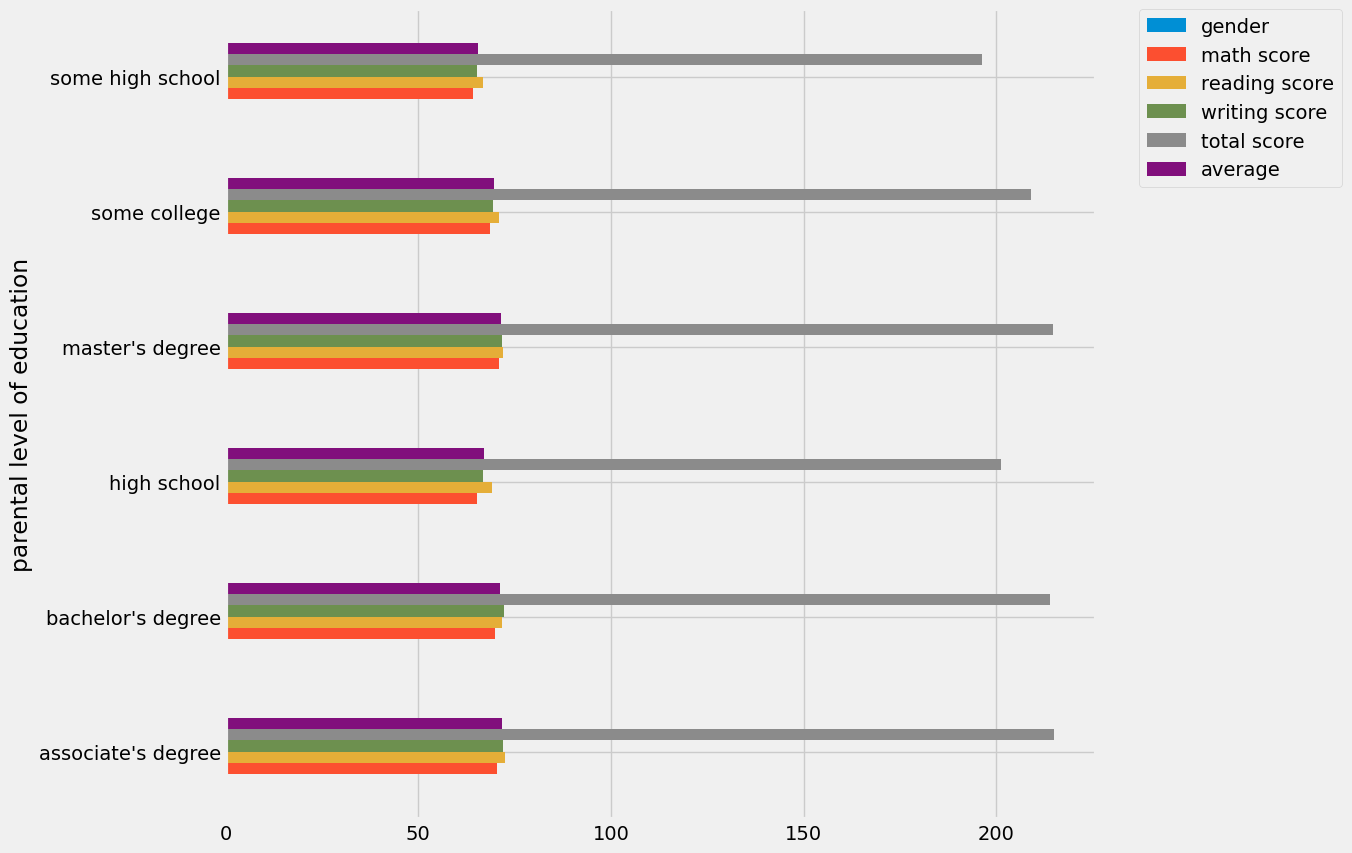

In [67]:
student_data.groupby('parental level of education')[numeric_columns].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights ####
##### The score of student whose parents possess master and bachelor level education are higher than others. #####

### 4.4.4 LUNCH COLUMN ###
#### Which type of lunch is most common amoung students ? ####
#### What is the effect of lunch type on test results? ####

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? ) ####



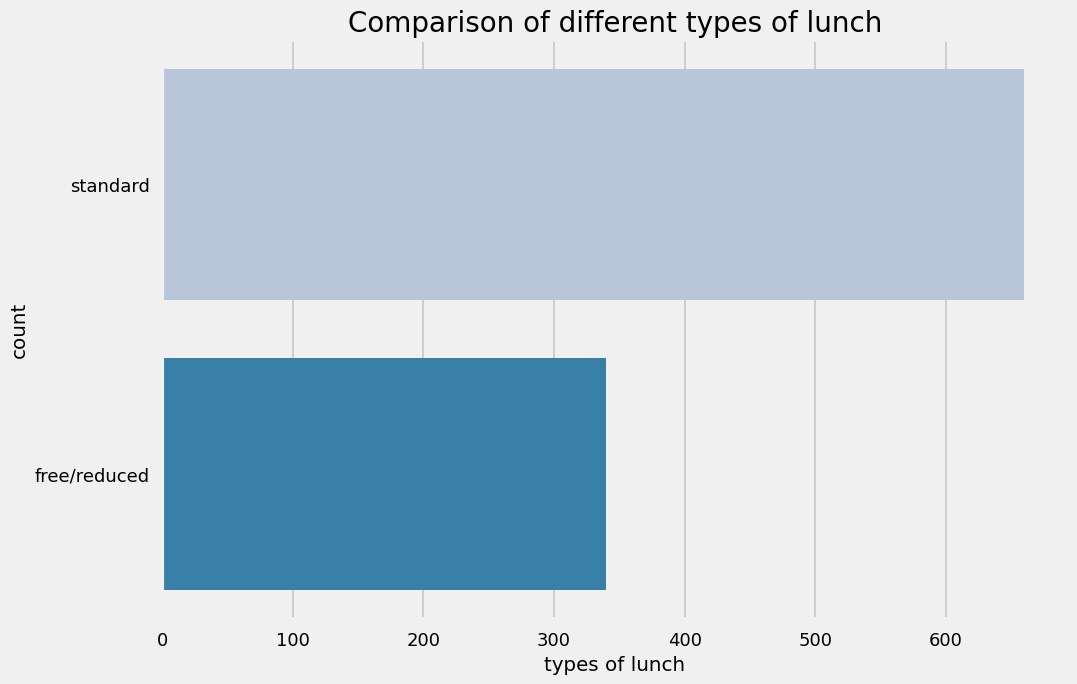

In [73]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(student_data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights ####
##### tudents being served Standard lunch was more than free lunch #####

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? ) ####

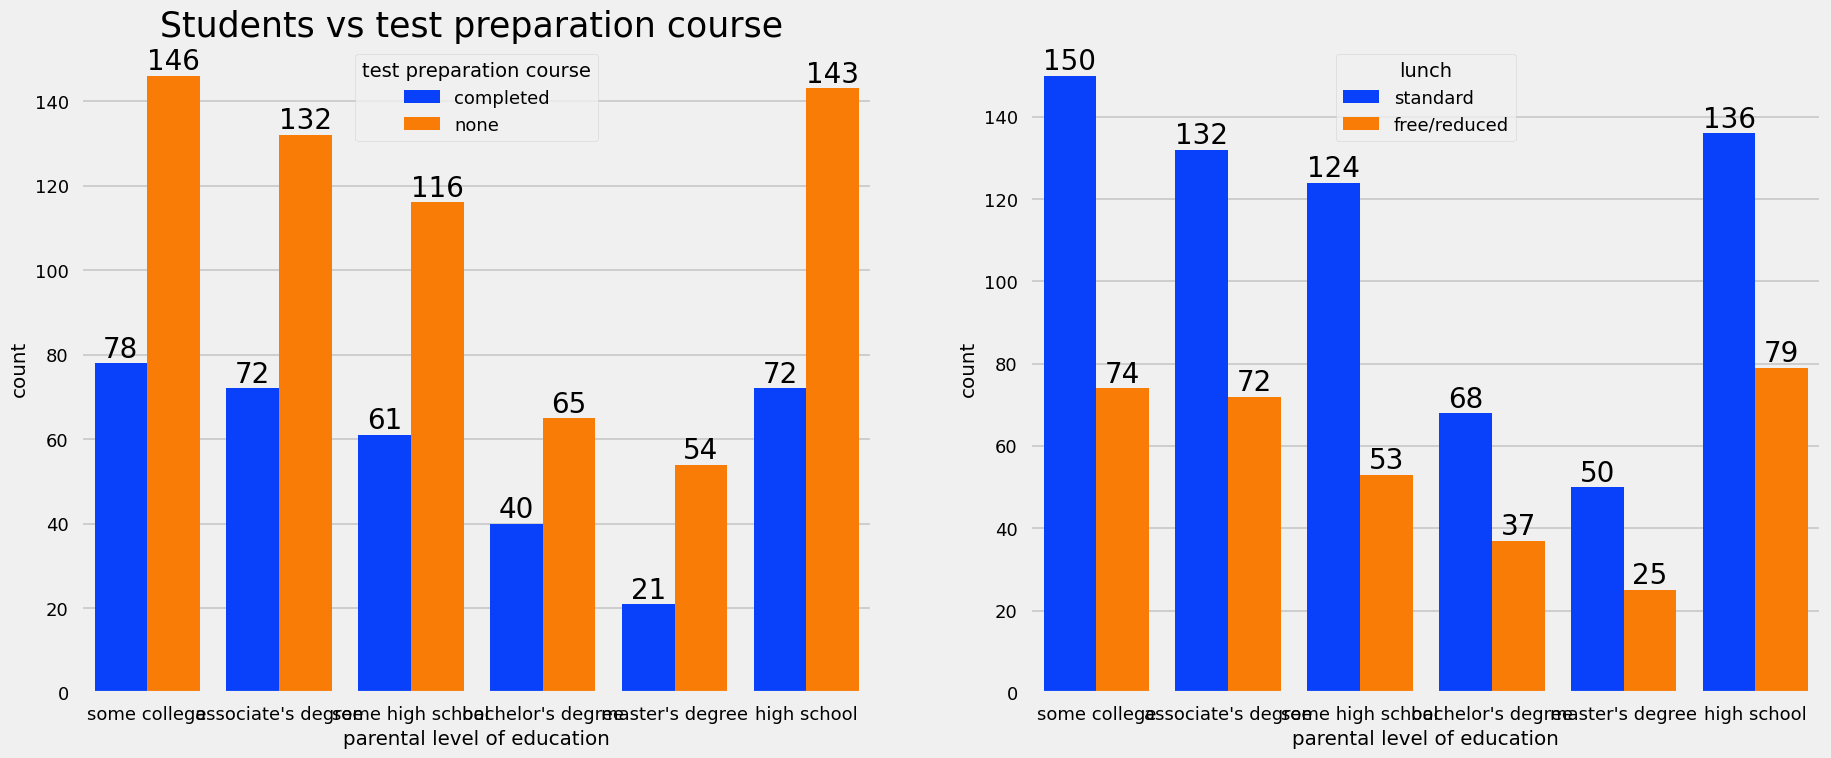

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=student_data['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=student_data['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights ####
##### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch #####

### 4.4.5 TEST PREPARATION COURSE COLUMN ###
#### Which type of lunch is most common amoung students ? ####
#### Is Test prepration course has any impact on student's performance ? ####

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? ) ###

<Axes: xlabel='lunch', ylabel='writing score'>

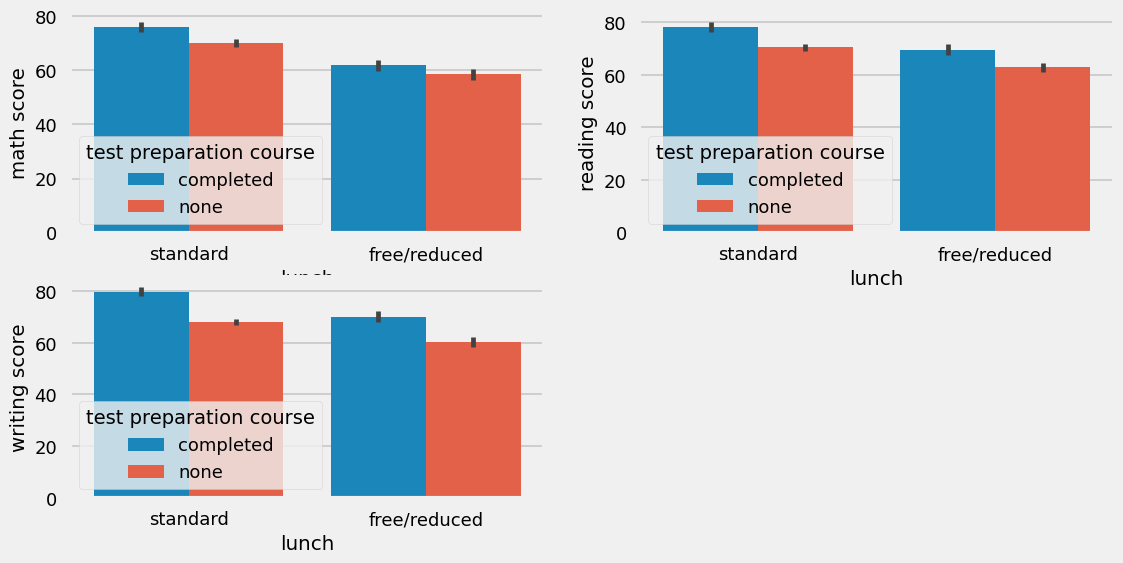

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=student_data['lunch'], y=student_data['math score'], hue=student_data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=student_data['lunch'], y=student_data['reading score'], hue=student_data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=student_data['lunch'], y=student_data['writing score'], hue=student_data['test preparation course'])

#### Insights ####
##### Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course #####

### 4.4.6 CHECKING OUTLIERS ###

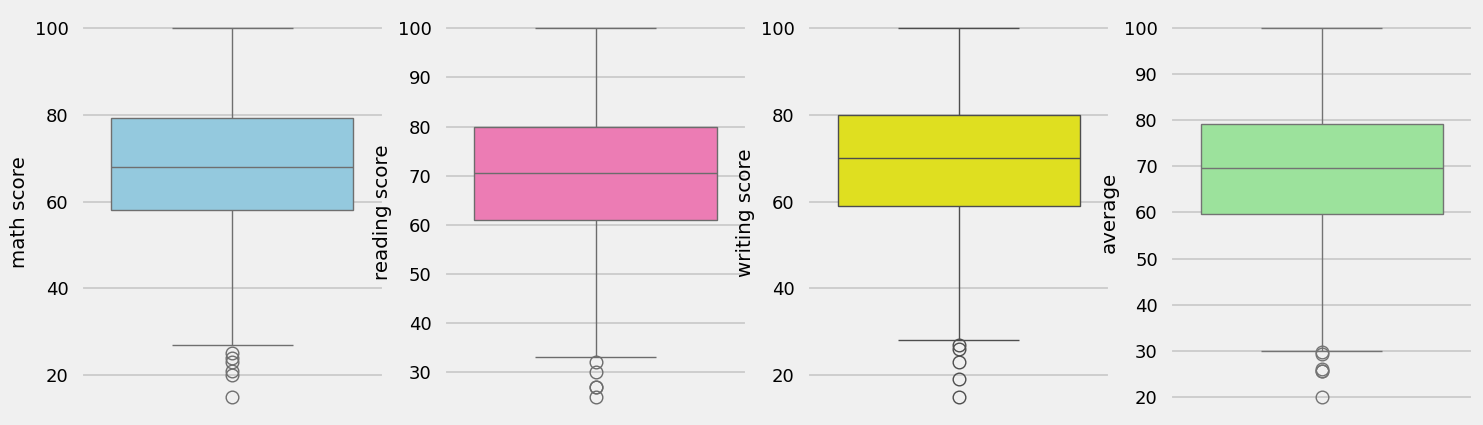

In [77]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_data['average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT ###

#### Insights ####
##### From the above plot it is clear that all the scores increase linearly with each other. #####

### 5. Conclusions ###
#### Student's Performance is related with lunch, race, parental level education ####
#### Females lead in pass percentage and also are top-scorers ####
#### Student's Performance is not much related with test preparation course ####
#### Finishing preparation course is benefitial. ####